In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('creditcard.csv')
df.isnull().mean()*100
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
265664,161989.0,0.150186,1.021460,-0.487477,-0.588199,1.045806,-0.731639,0.955991,-0.099897,-0.043339,...,-0.354144,-0.868344,0.067728,0.372287,-0.389526,0.125206,0.222528,0.082666,1.29,0
115803,74025.0,1.071614,0.044285,0.473877,1.347460,-0.279866,0.015511,-0.062310,0.161230,0.140353,...,-0.035187,0.016078,-0.055500,0.223227,0.571314,-0.342042,0.027462,0.009332,26.69,0
65775,51739.0,1.175893,0.074876,0.579373,0.575763,-0.642659,-0.808812,-0.100047,-0.006975,-0.048610,...,-0.197876,-0.699721,0.151736,0.498205,0.114502,0.067038,-0.043013,0.010699,15.36,0
185353,126631.0,1.274408,-1.248384,-1.699822,0.439260,0.660295,1.500925,0.179928,0.356696,0.274742,...,0.085767,-0.135966,0.086627,-1.690461,-0.564059,0.193982,-0.048651,-0.037237,300.00,0
21477,31697.0,-1.303505,0.305980,1.735987,-2.893345,-0.368520,-0.421282,0.147411,0.153683,1.164475,...,0.325770,1.039497,-0.198082,0.077486,0.090558,-0.093837,-0.057822,0.199384,19.00,0
227017,144900.0,1.744895,-0.847253,-2.122461,0.559077,0.078278,-0.867671,0.598368,-0.449793,-1.486163,...,-0.078027,-0.155935,-0.174894,-0.365053,0.300769,-0.505779,-0.050176,-0.034210,220.46,0
255890,157450.0,2.049991,-0.021714,-1.848046,0.604859,0.325483,-0.758396,0.073686,-0.193001,0.853166,...,0.043684,0.377605,0.002906,0.633830,0.220569,0.698385,-0.063114,-0.038736,11.50,0
81084,58778.0,-1.227025,0.555353,2.498204,1.204690,-1.024743,0.556608,-0.226897,0.544070,0.052205,...,0.303518,0.975695,0.005727,0.046321,0.080762,-0.049819,-0.208949,-0.239701,81.84,0
118655,75163.0,-4.569173,-11.154440,-2.036365,1.553456,-5.217233,0.977623,2.479768,-0.655557,-1.310486,...,1.565313,-1.805218,-2.525641,0.748455,-1.002476,-0.573420,-0.484181,0.567247,3085.14,0
274409,165996.0,-0.717099,0.609200,0.942147,-0.856774,0.050670,0.587662,-0.261243,0.776798,-0.010698,...,0.311059,0.800357,-0.186475,0.268966,-0.345630,0.517357,-0.006009,0.077368,11.50,0


In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

Text(0, 0.5, 'Frequency')

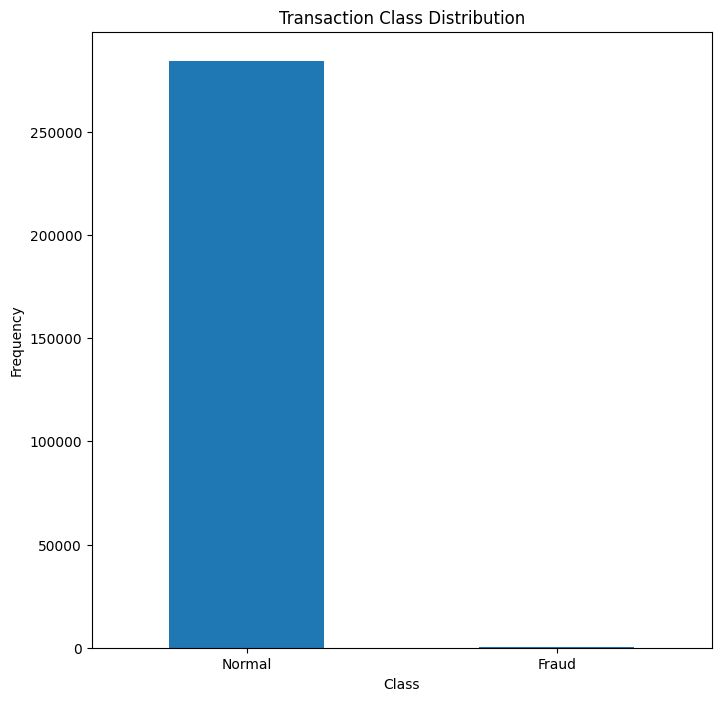

In [24]:
count_value=df['Class'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8,8))
count_value.plot(kind='bar',rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [35]:
fraud=df[df['Class']==1]
normal=df[df['Class']==0]
print(fraud.shape,normal.shape)


(492, 31) (284315, 31)


In [36]:
fraud.Amount.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [37]:
normal.Amount.describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

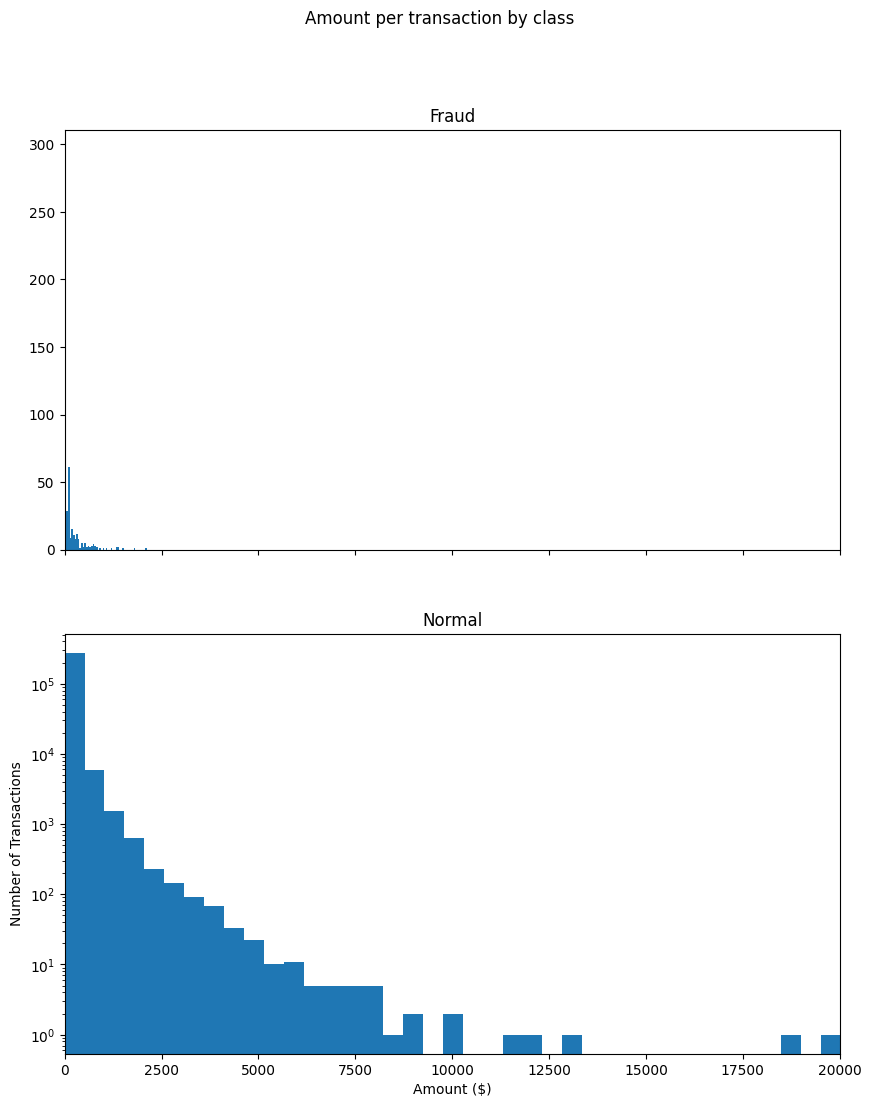

In [52]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize=(10, 12))
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [55]:
data1= df.sample(frac = 0.1,random_state=1)
data1.shape

(28481, 31)

In [62]:
Fraud = data1[data1['Class']==1]
Valid = data1[data1['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))


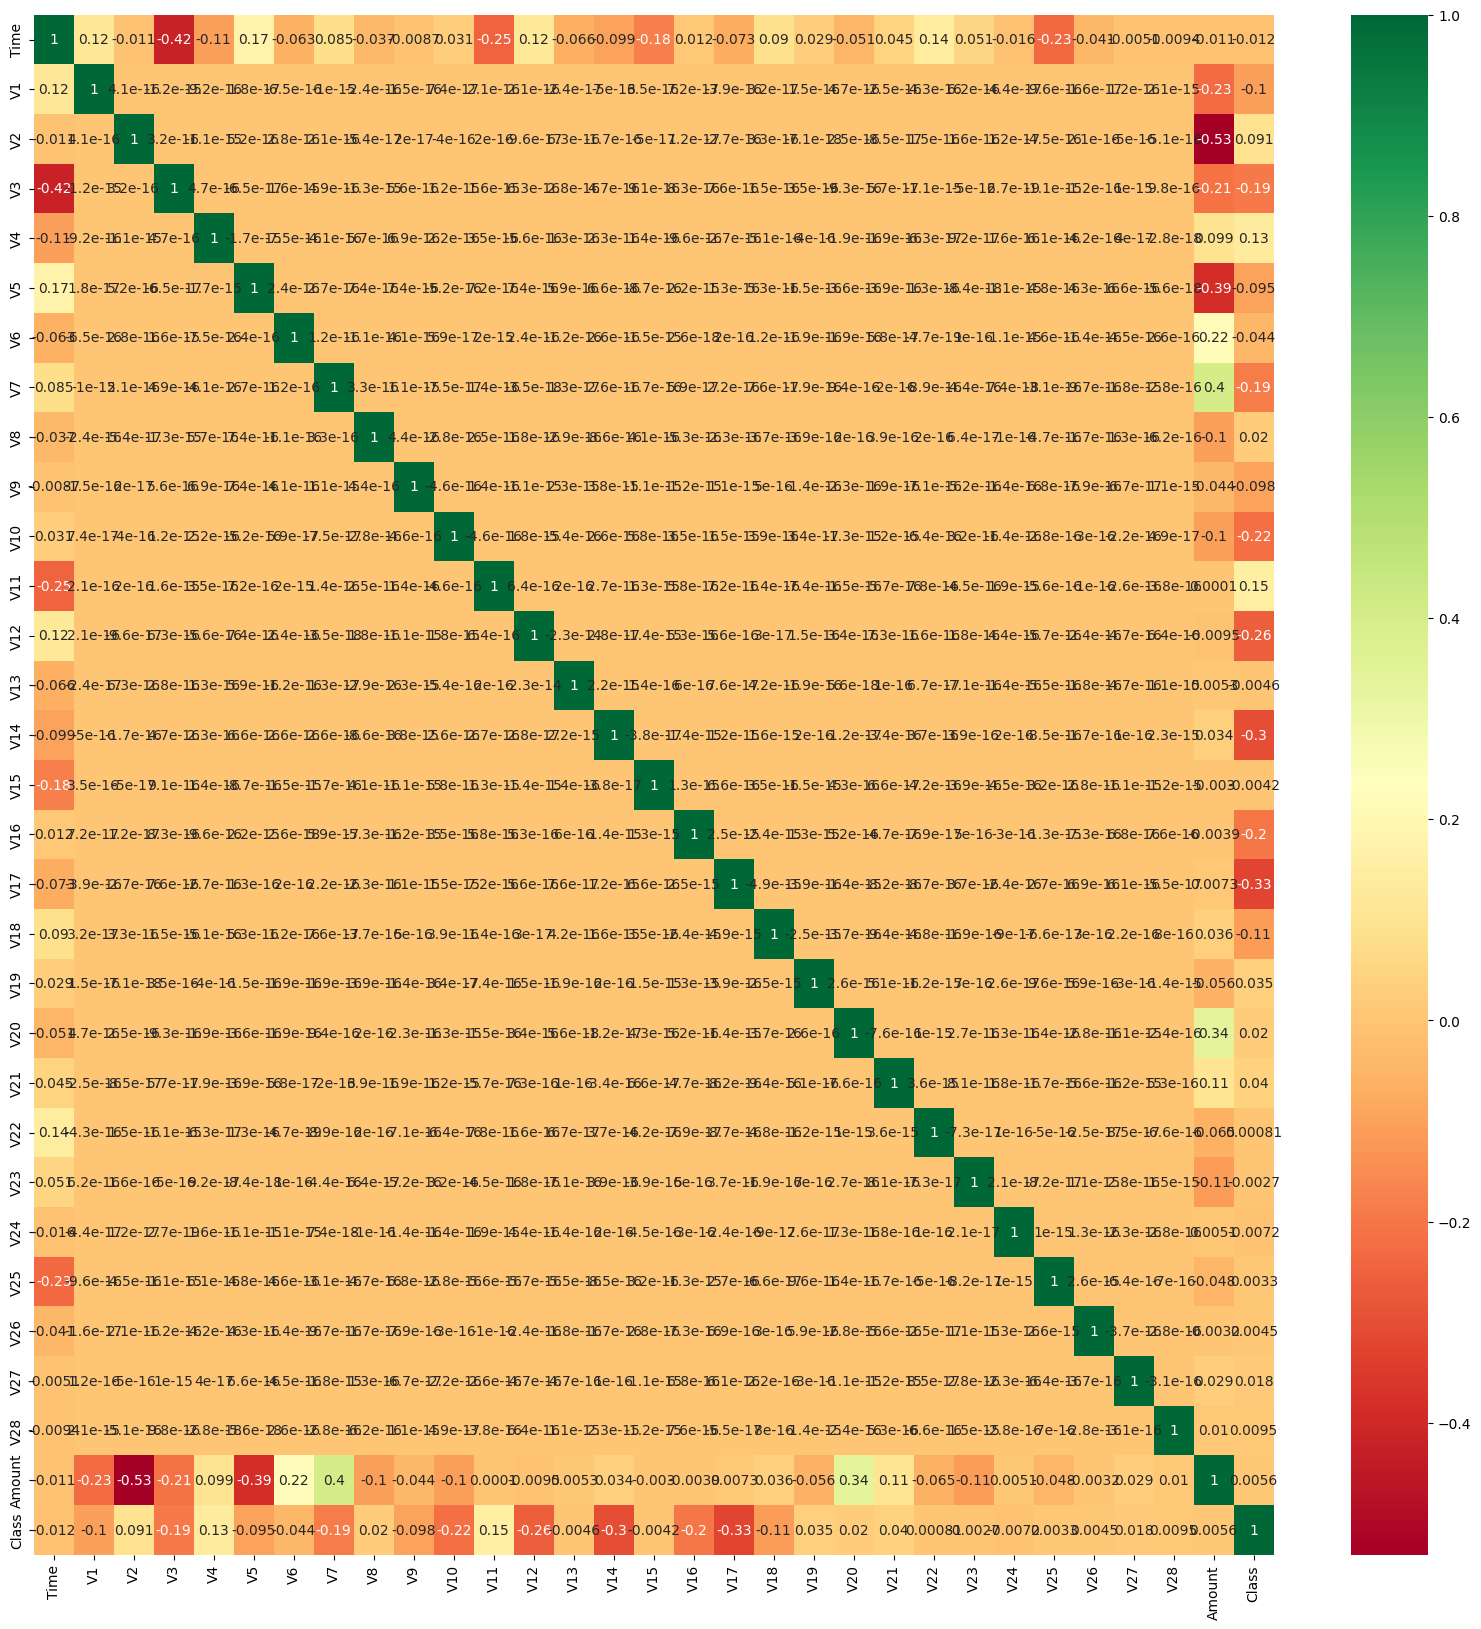

In [58]:
import seaborn as sns
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [66]:
import numpy as np

columns = data1.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [67]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import sklearn
import scipy

In [70]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

In [71]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 73
Accuracy Score :
0.9974368877497279
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

Support Vector Machine: 8516
Accuracy Score :
0.7009936448860644
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.70   